In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import seaborn as sb
from sklearn.model_selection import train_test_split
import scipy.misc

**Codes for images preprocessing**

In [ ]:
dataset = pd.read_csv("A_Z Handwritten Data/A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

# Splitting the dataset into train and test keeping the distribution same in both sets
train,test=train_test_split(dataset,test_size=0.3,stratify=dataset['label'])

In [ ]:
#creating and train folder for each of the image labels
val = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
trainpath,testpath='train','test'
for i in val.values():
    directory=str(i)+'_Images'
    tmppath1=os.path.join(trainpath,directory)
    tmppath2=os.path.join(testpath,directory)
    os.mkdir(tmppath1)
    os.mkdir(tmppath2)

In [ ]:
#saving the train images 
X = train.drop('label',axis = 1)
y = train['label']
folderpath='train'
for i in range(len(X)):
  try:
    im=Image.fromarray(X.iloc[i].values.reshape(28,28))
    tmp=im.convert('RGB')
    directory=str(val[y.iloc[i]])+'_Images'
    path=os.path.join(folderpath,directory) 
    tmp.save(path+'/'+val[y.iloc[i]]+str(i)+'.jpeg')
  except:
    continue

In [ ]:
#saving the test images 
X = test.drop('label',axis = 1)
y = test['label']
folderpath='test'
for i in range(len(X)):
  try:
    im=Image.fromarray(X.iloc[i].values.reshape(28,28))
    tmp=im.convert('RGB')
    directory=str(val[y.iloc[i]])+'_Images'
    path=os.path.join(folderpath,directory) 
    tmp.save(path+'/'+val[y.iloc[i]]+str(i)+'.jpeg')
  except:
    continue

## BASIC EDA 

In [ ]:
X = train.drop('label',axis = 1)
y = train['label']
print("shape:",X.shape)
print("columns count:",len(X.iloc[1]))
print("784 = 28X28")

shape: (260715, 784)
columns count: 784
784 = 28X28


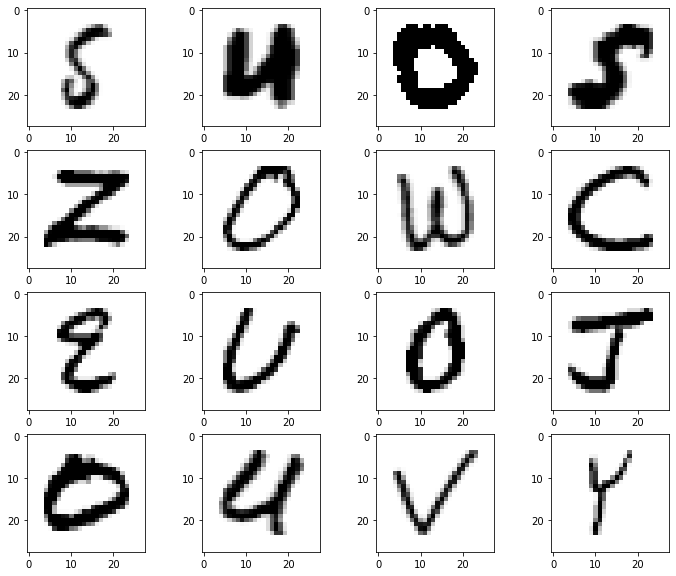

In [ ]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

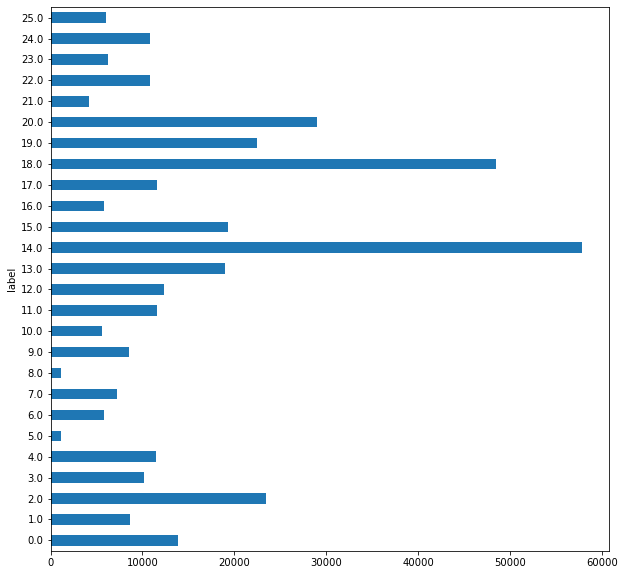

In [ ]:
#Checking the distributions of the group
label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [ ]:
#reading the data directly from the directory
imgarr=[]
labelarr=[]
for i in os.listdir('train/'):
  if i != '.ipynb_checkpoints':
    for j in os.listdir(os.path.join('train/',i)):
      try:
        arr=cv2.imread('train/'+i+'/'+j,cv2.IMREAD_GRAYSCALE)
        imgarr.append(arr.ravel())
        labelarr.append(i[0])
      except:
        continue
        
        
            
      

In [ ]:
print(len(imgarr),len(labelarr))
 #checking the size of the image_arr and label_arr

260715 260715


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=30)
X_embedded=tsne.fit_transform(np.array(imgarr[0:40000]))
X_embedded.shape

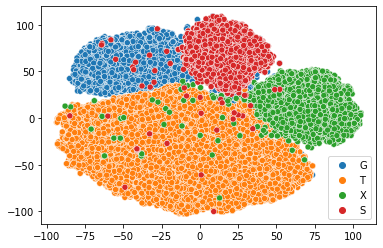

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sb.scatterplot(X_embedded[0:40000,0],X_embedded[0:40000,1],hue=labelarr[0:40000])

<BarContainer object of 26 artists>

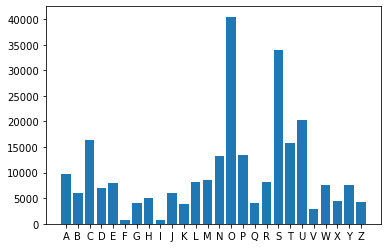

In [ ]:
#since the data contains imbalance classes
labeldf=pd.DataFrame({'label':labelarr})
plt.bar(labeldf.groupby("label")["label"].count().index, labeldf.groupby("label")["label"].count())

In [ ]:
#performing the undersampling for balancing the classes
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(imgarr, labelarr)
print(f"Training target statistics: {Counter(y_res)}")

Training target statistics: Counter({'A': 784, 'B': 784, 'C': 784, 'D': 784, 'E': 784, 'F': 784, 'G': 784, 'H': 784, 'I': 784, 'J': 784, 'K': 784, 'L': 784, 'M': 784, 'N': 784, 'O': 784, 'P': 784, 'Q': 784, 'R': 784, 'S': 784, 'T': 784, 'U': 784, 'V': 784, 'W': 784, 'X': 784, 'Y': 784, 'Z': 784})


<BarContainer object of 26 artists>

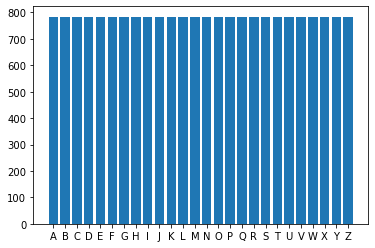

In [ ]:
#checking for the result
plt.bar(Counter(y_res).keys(),Counter(y_res).values())

In [ ]:
#saving the balanced dataset images
import scipy.misc
#creating the directory for saving the balanced images per class
val = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
folderpath='Balanced_Dataset'
for i in val.values():
  directory=str(i)+'_Images'
  path=os.path.join(folderpath,directory)
  os.mkdir(path)
#saving the images
folderpath='Balanced_Dataset'
for i in range(len(X_res)):
    im=Image.fromarray(np.array(X_res[i]).reshape(28,28))
    tmp=im.convert('RGB')
    directory=str(y_res[i])+'_Images'
    path=os.path.join(folderpath,directory)
    tmp.save(path+'/'+y_res[i]+str(i)+'.jpeg')